In [23]:
import numpy as np
import seaborn as sns
from numpy.random import rand
from math import sqrt, pi, exp
from mpl_toolkits import mplot3d
from numpy.linalg import eig
from scipy.stats import expon, gamma
from numpy import log, cos, sin
import matplotlib.pyplot as plt

## Problem 4a

In [2]:
sigma = np.array([[4,2,2], [2,4,0], [0,0,1]])

In [3]:
eigenvalues, eigenvectors = eig(sigma)

In [4]:
eigenvalues

array([6., 2., 1.])

In [5]:
eigenvectors

array([[ 0.70710678, -0.70710678, -0.68376346],
       [ 0.70710678,  0.70710678,  0.45584231],
       [ 0.        ,  0.        ,  0.56980288]])

In [6]:
eigenvalues = np.flip(eigenvalues, axis=0)

In [7]:
U = np.flip(eigenvectors, axis=1)

In [8]:
lam = np.diag(eigenvalues)
print(lam)

[[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 6.]]


In [9]:
print(U)

[[-0.68376346 -0.70710678  0.70710678]
 [ 0.45584231  0.70710678  0.70710678]
 [ 0.56980288  0.          0.        ]]


## Problem 4b

In [10]:
sqrt_lam = np.sqrt(lam)
print(sqrt_lam)

[[1.         0.         0.        ]
 [0.         1.41421356 0.        ]
 [0.         0.         2.44948974]]


In [11]:
U_sqrt_lam = np.matmul(U, sqrt_lam)
print(U_sqrt_lam)

[[-0.68376346 -1.          1.73205081]
 [ 0.45584231  1.          1.73205081]
 [ 0.56980288  0.          0.        ]]


## Problem 4c

In [12]:
# Need 1000 vectors in R3, to do this we will generate 3000 independent variables to form the vectors
def box_muller(n):    
    u = -2*log(rand(n//2))
    v = 2*pi*rand(n//2)
    x = np.sqrt(u)*cos(v)
    y = np.sqrt(u)*sin(v)
    return np.append(x,y)

In [13]:
random_vars = box_muller(3000)

In [14]:
random_points = random_vars.reshape((3,-1))
xs=random_points[0]
ys=random_points[1]
zs=random_points[2]

In [15]:
transformed_points = np.matmul(U_sqrt_lam, random_points)

In [16]:
xs=transformed_points[0]
ys=transformed_points[1]
zs=transformed_points[2]

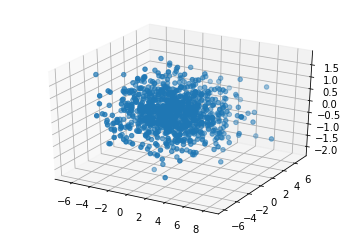

In [17]:
%matplotlib inline
ax = plt.axes(projection='3d')
ax.scatter3D(xs=xs, ys=ys, zs=zs)

## Problem 4d

It seems to spread out along the line y=x.
The eigenvector with the largest eigenvalue is [1,1,0] so this makes sense

## Problem 5b

In [18]:
M = 250

In [19]:
def solve_problem_5():
    random_numbers = []
    n_expon_generated = 0
    n_accepted = 0
    while n_accepted < 1000:
        u = rand()
        y = expon.rvs(scale=2)
        f_y = y**(5/2)*exp(-y)
        g_y = 0.5*exp(-y/2)
        n_expon_generated += 1
        if u <= f_y/(M*g_y):
            random_numbers.append(y)
            n_accepted += 1         
    return random_numbers, n_expon_generated, n_accepted

In [20]:
random_numbers, n_expon_generated, n_accepted = solve_problem_5()

In [29]:
real_random_numbers = gamma.rvs(a=7/2, scale=1, size=1000)

/Users/cfizette/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/cfizette/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


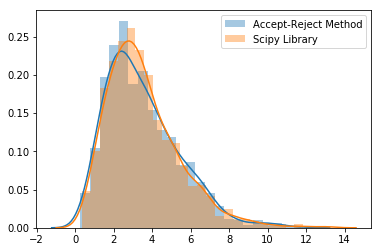

In [30]:
sns.distplot(random_numbers)
sns.distplot(real_random_numbers)
plt.legend(['Accept-Reject Method', 'Scipy Library'])

Looks good to me.....

## Problem 5c

In [32]:
accept_rate = n_accepted / n_expon_generated
accept_rate

0.01251705448673818

The accept rate is around 1.2%